In [24]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace = True)
df.drop(['id'], 1, inplace = True)


x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

x_train,x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test,y_test)
print(accuracy)

#let's now make some prediction..
example_measure = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measure = example_measure.reshape(len(example_measure), -1)
#example_measure = example_measure.reshape(2, -1)

prediction = clf.predict(example_measure)
print(prediction)
#header = df.head
#print(header)

0.95
[2 2]


In [5]:
 # calculating euclidean distance
from math import sqrt
plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt ((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
print(euclidean_distance)

2.2360679775


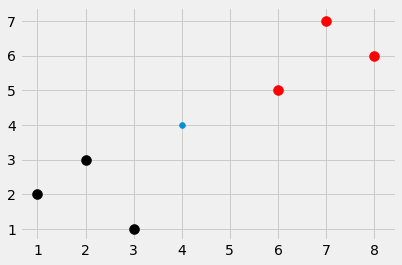

In [8]:
#creating our K nearest neighbor algorithm
dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_point = [4,4]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)

plt.scatter(new_point[0],new_point[1])
plt.show()

[('k', 2)]
k


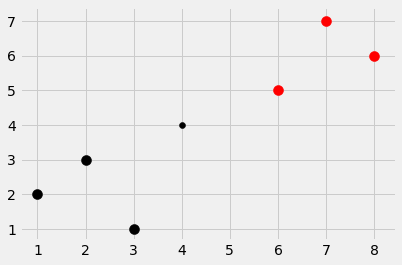

In [10]:
 def K_nearest_neighbors(data, predict, k=3):
        if len(data) >= k:
            warnings.warn('k is set to a value less than total voting groups!')
        distances = []
        for group in data:
            for features in data[group]:
                euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
                distances.append([euclidean_distance, group])
                
        votes = [i[1] for i in sorted(distances)[:k]]
        print(Counter(votes).most_common(1))
        vote_result = Counter(votes).most_common(1)[0][0]
        
        return vote_result

result = K_nearest_neighbors(dataset, new_point, k=3)
print(result)

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)

plt.scatter(new_point[0],new_point[1], color= result)
plt.show()
